#Full DL Solution

© 2023, Zaka AI, Inc. All Rights Reserved.

---

###**Case Study:** Stroke Prediction

**Objective:** The goal of this project is to walk you through a case study where you can apply the deep learning concepts that you learned about during the week. By the end of this project, you would have developed a solution that predicts if a person will have a stroke or not.


**Dataset Explanation:** We will be using the stroke dataset. Its features are:


* **id:** unique identifier
* **gender:** "Male", "Female" or "Other"
* **age:** age of the patient
* **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* **ever_married:** "No" or "Yes"
* **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* **Residence_type:** "Rural" or "Urban"
* **avg_glucose_level:** average glucose level in blood
* **bmi:** body mass index
* **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* **stroke:** 1 if the patient had a stroke or 0 if not

#Importing Libraries

We start by importing the libraries: numpy and pandas

In [87]:
#Test Your Zaka
import numpy as np
import pandas as pd

#Loading the Dataset

We load the dataset from a csv file, and see its first rows

In [88]:
#Test Your Zaka
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Exploratory Data Analysis

Now we start the exploratory data analysis.

###Shape of the data

First, you need to know the shape of our data (How many examples and features do we have)

In [89]:
#Test Your Zaka
print('we have {} examples and {} features '.format(df.shape[0],df.shape[1]) )

we have 5110 examples and 12 features 


###Types of different Columns

See the type of each of your features and see if you have any nulls

In [90]:
#Test Your Zaka
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###Dealing with categorical variables

Now we will walk through the categorical variables that we have to see the categories and the counts of each of them.

In [91]:
#Test Your Zaka

categorical = df.select_dtypes(include='object').columns
print('We have {} categorical features and these are: {} \n \n'.format(categorical.shape[0], ", ".join(categorical)))
for column in categorical:
    print(df[column].value_counts())
    print()

We have 5 categorical features and these are: gender, ever_married, work_type, Residence_type, smoking_status 
 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Yes    3353
No     1757
Name: ever_married, dtype: int64

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



#Preprocessing

Prepare the data in a way to be ready to be used to train a DL model.

In [92]:
#filling NaN values in 'bmi'
df['bmi'].fillna(df.bmi.mean(), inplace=True)

Text(0.5, -0.1, 'Regarding to the Equality in percentages we can see in each plot.. We can deduce that these features are redundant for our solution and analyses process')

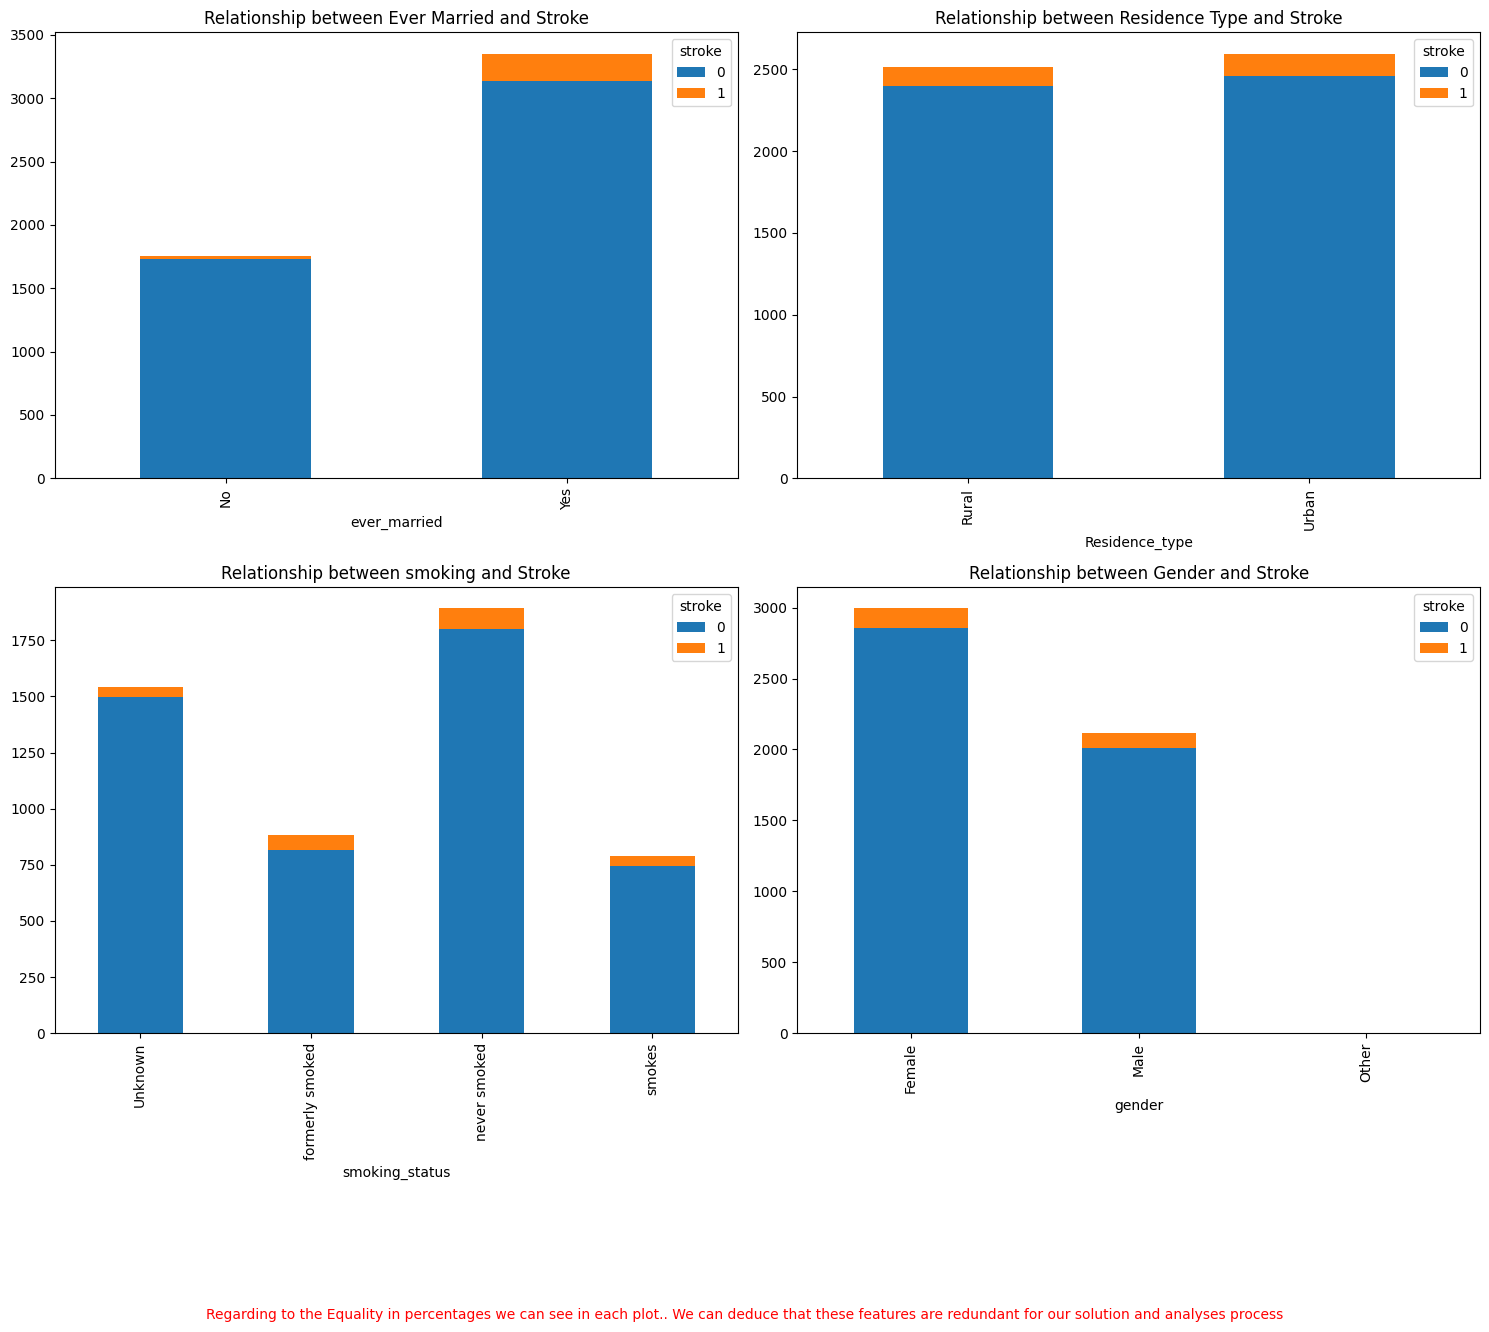

In [93]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Barplot for 'ever_married' and 'stroke'
df.groupby('ever_married')['stroke'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axes[0][0])
axes[0][0].set_title('Relationship between Ever Married and Stroke')

# Barplot for 'residence_type' and 'stroke'
df.groupby('Residence_type')['stroke'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axes[0][1])
axes[0][1].set_title('Relationship between Residence Type and Stroke')

# Barplot for 'smoking_status' and 'stroke'
df.groupby('smoking_status')['stroke'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axes[1][0])
axes[1][0].set_title('Relationship between smoking and Stroke')

# Barplot for 'ever_married' and 'stroke'
df.groupby('gender')['stroke'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axes[1][1])
axes[1][1].set_title('Relationship between Gender and Stroke')


plt.tight_layout()
plt.text(0.5, -0.1, 'Regarding to the Equality in percentages we can see in each plot.. We can deduce that these features are redundant for our solution and analyses process', color='red' ,  horizontalalignment='center', verticalalignment='center', transform=fig.transFigure)



Text(0.5, -0.1, 'Regarding to the Inequality in percentages we can see in each plot.. We can deduce that these features are important for our solution and analyses process')

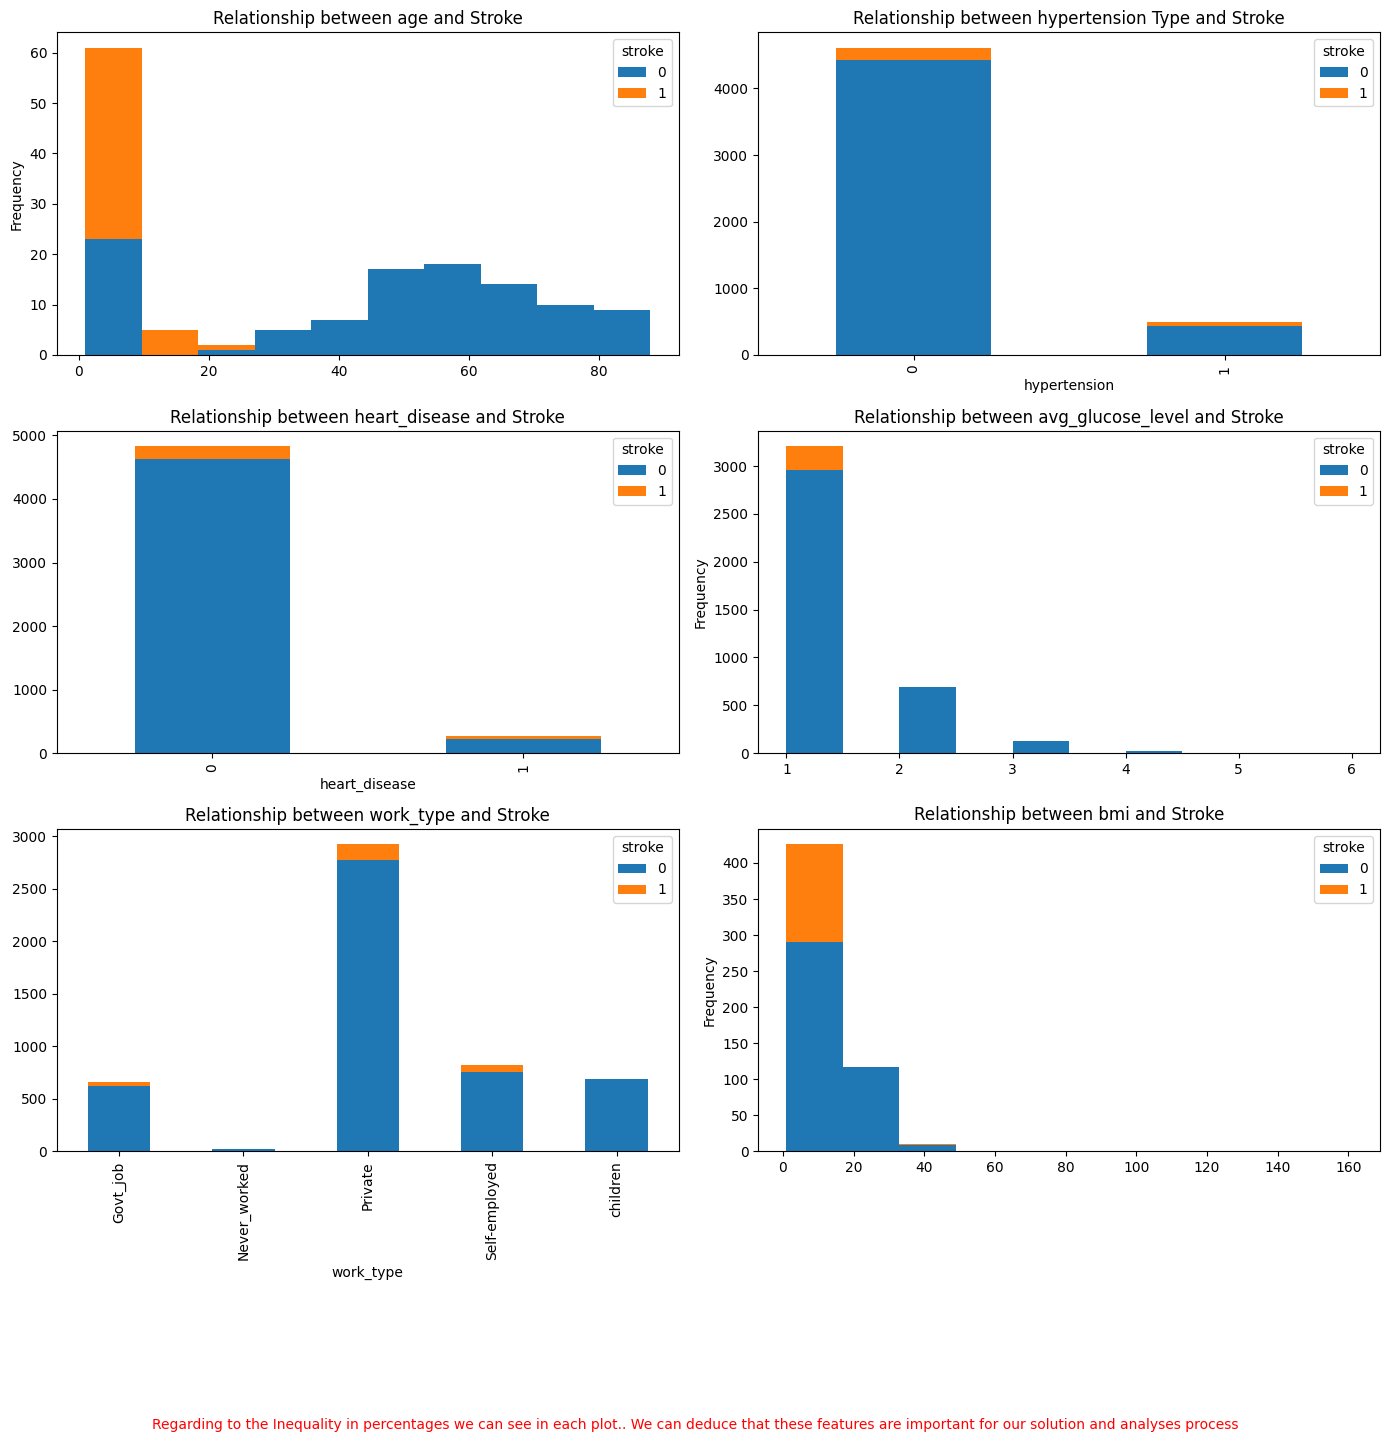

In [94]:
fig, axes = plt.subplots(3, 2, figsize=(14, 13))

# Barplot for 'age' and 'stroke'
df.groupby('age')['stroke'].value_counts().unstack().plot(kind='hist', stacked=True, ax=axes[0][0])
axes[0][0].set_title('Relationship between age and Stroke')

# Barplot for 'hypertension' and 'stroke'
df.groupby('hypertension')['stroke'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axes[0][1])
axes[0][1].set_title('Relationship between hypertension Type and Stroke')

# Barplot for 'heart_disease' and 'stroke'
df.groupby('heart_disease')['stroke'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axes[1][0])
axes[1][0].set_title('Relationship between heart_disease and Stroke')

# Barplot for 'avg_glucose_level' and 'stroke'
df.groupby('avg_glucose_level')['stroke'].value_counts().unstack().plot(kind='hist', stacked=True, ax=axes[1][1])
axes[1][1].set_title('Relationship between avg_glucose_level and Stroke')

# Barplot for 'work_type' and 'stroke'
df.groupby('work_type')['stroke'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axes[2][0])
axes[2][0].set_title('Relationship between work_type and Stroke')

# Barplot for 'bmi' and 'stroke'
df.groupby('bmi')['stroke'].value_counts().unstack().plot(kind='hist', stacked=True, ax=axes[2][1])
axes[2][1].set_title('Relationship between bmi and Stroke')

plt.tight_layout()
plt.text(0.5, -0.1, 'Regarding to the Inequality in percentages we can see in each plot.. We can deduce that these features are important for our solution and analyses process', color='red' ,  horizontalalignment='center', verticalalignment='center', transform=fig.transFigure)


In [95]:
#Test Your Zaka

#Dropping ID and Gender cols bcz they don't affect our problem
df = df.drop(['id', 'gender'], axis=1)
df = df.drop(['ever_married' , 'Residence_type' , 'smoking_status'], axis =1)  #Already justified

#encoding the 'work_type'
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['work_type'] = encoder.fit_transform(df['work_type'])

#one hot encoding (we can use it if we want to split our target into two classes 'stroke' and 'no stroke')
from keras.utils import np_utils
columns_to_encode = ['hypertension', 'heart_disease', 'work_type', 'stroke']
dummies=[]
for column in columns_to_encode :
  dummy = np_utils.to_categorical(df[column])
  dummies.append(dummy)

#normalizing the data
df=df.divide(df.max())

#splitting data between training and testing
X= df.iloc[:,:6].values.astype(float)
Y= df.iloc[:,-1].values

In [96]:
print(df.shape)
df.head()

(5110, 7)


,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke
0,0.817073,0.0,1.0,0.50,0.841577,0.375000,1.0
1,0.743902,0.0,0.0,0.75,0.744130,0.296037,1.0
2,0.975610,0.0,1.0,0.50,0.389784,0.332992,1.0
3,0.597561,0.0,0.0,0.50,0.630124,0.352459,1.0
4,0.963415,1.0,0.0,0.75,0.640760,0.245902,1.0


#Building the DL Model

Now it's time to build the actual model. Propose a DL architecture suitable for this problem and print its summary.

In [97]:
#Test Your Zaka
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model() :
  model = Sequential()
  model.add(Dense(10, input_dim=(6), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  return model


###Compiling the model

Now we need to compile the model.

In [98]:
#Test Your Zaka
model = create_model()
model.compile(optimizer = 'sgd' ,loss ='binary_crossentropy' , metrics =['accuracy'])

###Fitting the model

we split our dataset between training and testing, and we fit the model on training data (70%), and validate on the testing data (30%).

In [99]:
#Test Your Zaka
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size =0.3 , random_state = 42)
model.fit(x_train , y_train , validation_data=(x_test,y_test) , epochs = 70 , batch_size= 10)

y_pred_proba = model.predict(x_test)
y_pred = np.round(y_pred_proba).astype(int)
report = classification_report(y_test, y_pred)
print(report)

Epoch 1/70
358/358 [==============================] - 2s 3ms/step - loss: 0.3004 - accuracy: 0.9519 - val_loss: 0.2361 - val_accuracy: 0.9419
Epoch 2/70
358/358 [==============================] - 1s 2ms/step - loss: 0.1946 - accuracy: 0.9553 - val_loss: 0.2290 - val_accuracy: 0.9419
Epoch 3/70
358/358 [==============================] - 1s 3ms/step - loss: 0.1881 - accuracy: 0.9553 - val_loss: 0.2266 - val_accuracy: 0.9419
Epoch 4/70
358/358 [==============================] - 1s 3ms/step - loss: 0.1853 - accuracy: 0.9553 - val_loss: 0.2240 - val_accuracy: 0.9419
Epoch 5/70
358/358 [==============================] - 1s 3ms/step - loss: 0.1829 - accuracy: 0.9553 - val_loss: 0.2211 - val_accuracy: 0.9419
Epoch 6/70
358/358 [==============================] - 1s 2ms/step - loss: 0.1808 - accuracy: 0.9553 - val_loss: 0.2190 - val_accuracy: 0.9419
Epoch 7/70
358/358 [==============================] - 1s 3ms/step - loss: 0.1789 - accuracy: 0.9553 - val_loss: 0.2169 - val_accuracy: 0.9419
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


What can you deduce from the results you obtained?

**[Share your Zaka here]**

**the model isn't capable to predict for the second class ,which is obviously bcz of the inbalancing data we have 89 vs 1444**

#Improving DL Models

**TIP: When tuning your model to obtain a better performance, make sure you use a validation set**

###Data Improvement

After having studied your data in previous parts, enhance the performance of your model with one data improvement using **SMOTE**.

In [100]:
#Test Your Zaka
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, Y_resampled = smote.fit_resample(X, Y)

model1= create_model()
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(X_resampled , Y_resampled , test_size =0.3 , random_state = 42)
model1.compile(optimizer = 'sgd' , loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(x_train1 , y_train1 , validation_data=(x_test1,y_test1) , epochs = 70 , batch_size= 10)

y_pred_proba1 = model1.predict(x_test1)
y_pred1 = np.round(y_pred_proba1).astype(int)
report1 = classification_report(y_test1, y_pred1)
print(report1)



Epoch 1/70
681/681 [==============================] - 2s 3ms/step - loss: 0.6171 - accuracy: 0.7377 - val_loss: 0.5890 - val_accuracy: 0.7124
Epoch 2/70
681/681 [==============================] - 2s 3ms/step - loss: 0.5642 - accuracy: 0.7422 - val_loss: 0.5491 - val_accuracy: 0.7446
Epoch 3/70
681/681 [==============================] - 2s 3ms/step - loss: 0.5317 - accuracy: 0.7500 - val_loss: 0.5253 - val_accuracy: 0.7497
Epoch 4/70
681/681 [==============================] - 2s 2ms/step - loss: 0.5112 - accuracy: 0.7558 - val_loss: 0.5111 - val_accuracy: 0.7494
Epoch 5/70
681/681 [==============================] - 2s 3ms/step - loss: 0.4972 - accuracy: 0.7621 - val_loss: 0.5005 - val_accuracy: 0.7611
Epoch 6/70
681/681 [==============================] - 2s 3ms/step - loss: 0.4885 - accuracy: 0.7596 - val_loss: 0.4931 - val_accuracy: 0.7593
Epoch 7/70
681/681 [==============================] - 2s 3ms/step - loss: 0.4830 - accuracy: 0.7586 - val_loss: 0.4892 - val_accuracy: 0.7607
Epoch 

Comment the performance you obtained

**[Share your Zaka here]**

**the model performance has remarkably improved and became capable to predict fairly between the two target classes but still need some improvements**

###Model Design

Propose one model design method to improve the performance of your model even more.

In [101]:
#Test Your Zaka
from tensorflow.keras.optimizers import SGD
sgd1 = SGD(learning_rate=0.01, momentum=0.01, weight_decay=0.01/30, nesterov=False)
model1.compile(optimizer=sgd1 , loss="binary_crossentropy" , metrics = "accuracy")
model1.fit(x_train1 , y_train1 , validation_data=(x_test1,y_test1) , epochs = 70 , batch_size= 10)

y_pred_proba1 = model1.predict(x_test1)
y_pred1 = np.round(y_pred_proba1).astype(int)
report1 = classification_report(y_test1, y_pred1)
print(report1)


Epoch 1/70
681/681 [==============================] - 4s 3ms/step - loss: 0.4651 - accuracy: 0.7678 - val_loss: 0.4775 - val_accuracy: 0.7621
Epoch 2/70
681/681 [==============================] - 2s 3ms/step - loss: 0.4653 - accuracy: 0.7708 - val_loss: 0.4791 - val_accuracy: 0.7641
Epoch 3/70
681/681 [==============================] - 2s 3ms/step - loss: 0.4654 - accuracy: 0.7693 - val_loss: 0.4755 - val_accuracy: 0.7662
Epoch 4/70
681/681 [==============================] - 2s 3ms/step - loss: 0.4651 - accuracy: 0.7694 - val_loss: 0.4757 - val_accuracy: 0.7665
Epoch 5/70
681/681 [==============================] - 2s 3ms/step - loss: 0.4651 - accuracy: 0.7687 - val_loss: 0.4784 - val_accuracy: 0.7648
Epoch 6/70
681/681 [==============================] - 2s 3ms/step - loss: 0.4651 - accuracy: 0.7691 - val_loss: 0.4754 - val_accuracy: 0.7676
Epoch 7/70
681/681 [==============================] - 2s 3ms/step - loss: 0.4651 - accuracy: 0.7696 - val_loss: 0.4758 - val_accuracy: 0.7635
Epoch 

Comment the performance of your model

**[Share your Zaka here]**

**the performance is kind of the same as before but with a really slight differences**

###Hyperparameter Tuning

Now we will tune some hyperparameters of our model. Pick two hyperparameters to optimize, and run a grid search to optimize them. Then fit your model on the best parameters.

In [109]:
#Test Your Zaka
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model2() :
  model = Sequential()
  model.add(Dense(10, input_dim=(6), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='sgd' , loss = "binary_crossentropy" , metrics ='accuracy')

  return model

model2 = KerasClassifier(build_fn=create_model2)

param_grid = { 'epochs': [50, 100, 150],
              'batch_size': [16, 32, 64]  }

grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5)
grid_search.fit(x_train1, y_train1)

# Print the best score and best parameters
print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)


<ipython-input-109-d82b64b0ed55>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn=create_model2)


Streaming output truncated to the last 5000 lines.
Epoch 63/100
171/171 [==============================] - 1s 3ms/step - loss: 0.4692 - accuracy: 0.7636
Epoch 64/100
171/171 [==============================] - 1s 3ms/step - loss: 0.4693 - accuracy: 0.7629
Epoch 65/100
171/171 [==============================] - 1s 3ms/step - loss: 0.4693 - accuracy: 0.7629
Epoch 66/100
171/171 [==============================] - 1s 4ms/step - loss: 0.4691 - accuracy: 0.7630
Epoch 67/100
171/171 [==============================] - 1s 3ms/step - loss: 0.4692 - accuracy: 0.7634
Epoch 68/100
171/171 [==============================] - 1s 3ms/step - loss: 0.4692 - accuracy: 0.7636
Epoch 69/100
171/171 [==============================] - 1s 3ms/step - loss: 0.4686 - accuracy: 0.7643
Epoch 70/100
171/171 [==============================] - 1s 3ms/step - loss: 0.4692 - accuracy: 0.7652
Epoch 71/100
171/171 [==============================] - 1s 3ms/step - loss: 0.4689 - accuracy: 0.7641
Epoch 72/100
171/171 [=========

In [ ]:
best_model = grid_search.best_estimator_
y_pred1 = best_model.predict(x_test1)

accuracy1 = accuracy_score(y_test1,y_pred1)
f1 = f1_score(y_test1,y_pred1)
print(" Accuracy: {} \n f1_score: {} ".format(accuracy1,f1))

Comment the performance of your model

**[Share Your Zaka here]**

**the model performance got more improved and became ready to predict with the higher accuracy possible**